# Evolution Strategies

So far, we have only performed one random step every time 
In this part we are going to use evolution strategies to optimize our models.
Evolution strategies often use multiple samples to compare different mutations.
These mutations are compared, selected or graded in a certain way.

We are going to train the same linear regression model on the Boston houses dataset.



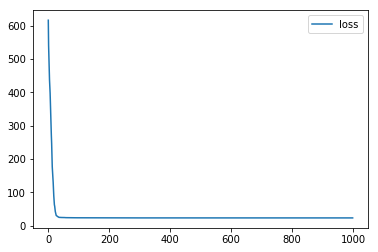

loss:  22.983535279215218
validation loss 20.742780779951705


In [71]:
import numpy as np, matplotlib.pyplot as plt
np.random.seed(0)
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
np.random.seed(42)

boston = datasets.load_boston()

X = boston['data']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

y = boston['target']
slr = StandardScaler()
X_train = slr.fit_transform(X_train)
X_test = slr.transform(X_test)



def mse(y_true, y_pred):
    return np.average(np.square(y_true - y_pred))

def log_reg(weights, bias, X, y):
    y_pred = X.dot(weights) + bias
    return mse(y, y_pred)

npop = 32 # population size
sigma = 0.5 # noise standard deviation

W = np.zeros(X.shape[1])
b = np.array([0])

W_moment = np.zeros(X.shape[1])
b_moment = np.array([0.0])

sigma_decay = 0.995

num_iters = 1000

loss_history = []
for i in range(num_iters):
    N_W = np.random.randn(npop, W.shape[0]) * sigma
    N_b = np.random.randn(npop, 1) * sigma
    R = np.zeros(npop)
    for j in range(npop):
        W_try = W + N_W[j]
        b_try = b + N_b[j] 
        R[j] = log_reg(W_try, b_try, X_train, y_train)

    R_min = np.argmin(R)
    best_W = N_W[R_min]
    best_b = N_b[R_min]

    W_2 = best_W
    b_2 = best_b

    if log_reg(W + W_2, b + b_2, X_train, y_train) <= R_start:
        W = W + W_2
        b = b + b_2
    R_start = log_reg(W, b, X_train, y_train)

    loss_history.append(R_start)
    sigma *= sigma_decay

loss_line, = plt.plot(np.array(loss_history), label='loss')
plt.legend(handles=[loss_line])
plt.show()
print("loss: ", loss_history[-1])

print("validation loss", log_reg(W, b, X_test, y_test))


We see that the training loss drop much more quickly when we have a larger population size.

# References
https://blog.openai.com/evolution-strategies/

https://gist.github.com/karpathy/77fbb6a8dac5395f1b73e7a89300318d